# **Projeto de análise da evolução do COVID 19 no Brasil**

## Digital Innovation One

#Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import re

# Leitura do Arquivo

In [2]:
df = pd.read_csv("covid_19_data.csv", parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


# Tipos de dados

In [3]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

#Corrigindo o nome das colunas

In [4]:

def corrigir_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

#Corrigindo todas as colunas do df

In [5]:

df.columns = [corrigir_colunas(col) for col in df.columns]
df.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


## Brasil

# Selecionando os dados somente do Brasil

In [6]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [7]:
brasil = df.loc[
    (df.countryregion == 'Brazil') &
    (df.confirmed >0)
]

In [8]:
brasil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


# Casos Confirmados

# Gráfico de evolução de casos confirmados

In [9]:
px.line(brasil, 'observationdate', 'confirmed', title = 'Casos Confirmados no Brasil')

# Novos casos por dia

# Técnica de programação funcional

In [10]:
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Visualizando

In [11]:
px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia')

# Mortes

In [12]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
               mode='lines+markers', line={'color':'red'})
)

# Layout do modelo
fig.update_layout(title='Mortes por COVID-19 no Brasil')

fig.show()

# Taxa de Crescimento da Covid 19

## Formula de avaliar a taxa de Crescimento

taca_crescimento = (presente/passado)**(1/n) -1

In [13]:
def taxa_crescimento(dados, variavel, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = dados.observationdate.loc[dados[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    if data_fim == None:
        data_fim = dados.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
        
    # Define os valores do presente e passado    
    passado = dados.loc[dados.observationdate == data_inicio, variavel].values[0]
    presente = dados.loc[dados.observationdate == data_fim, variavel].values[0]
    
    # Define o número de pontos no tempo que vai ser avaliado
    n = (data_fim - data_inicio).days
    
    # Calcular a taxa
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100

# Taxa de crescimento médio do COVID no Brasil em todo o periodo

In [14]:
taxa_crescimento(brasil, 'confirmed')

16.27183353112116

In [15]:
def taxa_crescimento_diaria(dados, variavel, data_inicio=None):
    if data_inicio == None:
        data_inicio = dados.observationdate.loc[dados[variavel] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = dados.observationdate.max()
    
    # Define o número de pontos no tempo que vai ser avaliado
    n = (data_fim - data_inicio).days
    
    #Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (dados[variavel].iloc[x] - dados[variavel].iloc[x-1]) / dados[variavel].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas) * 100

In [16]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [17]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [18]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed >0].min(0)

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

# Predições

#Predições de confirmações de contagio de COVID-19

In [19]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [20]:
res = seasonal_decompose(confirmados)

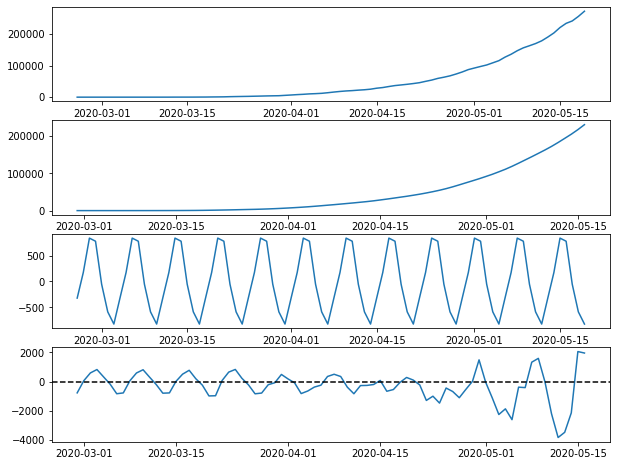

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show() 

#Predições de MORTE por COVID-19

In [22]:

mortes = brasil.deaths
mortes.index = brasil.observationdate
mortes

observationdate
2020-02-26        0.0
2020-02-27        0.0
2020-02-28        0.0
2020-02-29        0.0
2020-03-01        0.0
               ...   
2020-05-15    14962.0
2020-05-16    15662.0
2020-05-17    16118.0
2020-05-18    16853.0
2020-05-19    17983.0
Name: deaths, Length: 84, dtype: float64

In [23]:
res = seasonal_decompose(mortes)

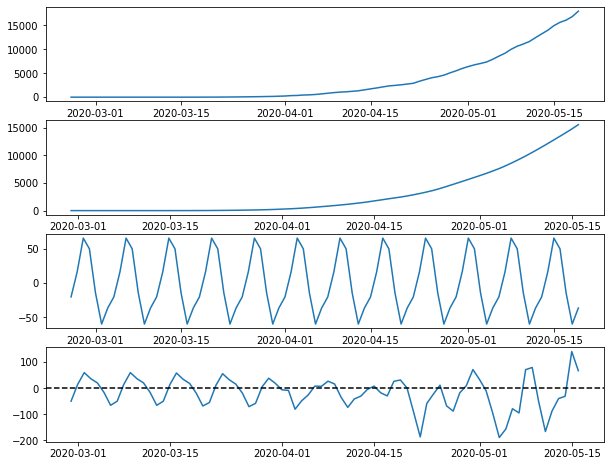

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(mortes.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()   

# modelo utilizando ARIMA

In [25]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

In [27]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

# Modelo de Crescimento

Vamos usar a biblioteca fbprophet

In [32]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 138 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [33]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638603 sha256=f06100f331730084c6fcdc34bd183513127bcbe6c6d387c3f6ac7094eff29119
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [34]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 3.4 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.7 which is incompatible.


In [35]:
from fbprophet import Prophet

# Processamentos

In [38]:
#preparando os dados:
train = confirmados.reset_index()[:-5]
test  = confirmados.reset_index()[-5:]

#renomear colunas:
train.rename(columns={'observationdate':'ds','confirmed':'y'}, inplace=True)
test.rename( columns={'observationdate':'ds','confirmed':'y'}, inplace=True)
test = test.set_index('ds')
test = test['y']

#Supondo que toda a população seja infectada:
#https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
pop = 213481773
#pop = 1000000
train['cap'] = pop

In [39]:
train

,ds,y,cap
0,2020-02-26,1.0,213481773
1,2020-02-27,1.0,213481773
2,2020-02-28,1.0,213481773
3,2020-02-29,2.0,213481773
4,2020-03-01,2.0,213481773
...,...,...,...
74,2020-05-10,162699.0,213481773
75,2020-05-11,169594.0,213481773
76,2020-05-12,178214.0,213481773
77,2020-05-13,190137.0,213481773


In [43]:
#Modelo:
profeta = Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

#Treinar o modelo:
profeta.fit(train)

#Construindo previsões para o futuro:
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil (supondo que toda a população seja infectada)',
                  yaxis_title='Casos confirmados', xaxis_title='Data',
                  margin=dict(l=30, r=30, t=80, b=5), width=1100, height=400, font=dict(size=14))
fig.show()